## Análise de Avaliações de Filmes

Este projeto foi desenvolvido para treinar a análise de dados usando um conjunto com milhões de avaliações de filmes feitas por usuários. Ao longo do notebook, utilizei as bibliotecas **Pandas**, **Matplotlib** e **Seaborn** para explorar e visualizar os dados.

### Algumas perguntas que orientei durante a análise:
- Como os usuários costumam avaliar os filmes?
- Os filmes mais avaliados também são os mais bem avaliados?
- O número de avaliações aumentou com o tempo?

### Etapas iniciais do projeto:
- Carregamento dos arquivos `ratings.csv` e `movies.csv` a partir do Google Drive
- Renomeação das colunas para facilitar o entendimento
- Conversão das datas (que estavam em formato de timestamp) para um formato legível
- Criação de uma coluna com o ano da avaliação, para facilitar análises ao longo do tempo





In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Monta o Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Caminho dos arquivos
caminho = '/content/drive/MyDrive/Análise_Dados/'

# Lê uma amostra dos dados
avaliacoes = pd.read_csv(caminho + 'ratings.csv', nrows=100000)
avaliacoes.columns = ['usuarioId', 'filmeId', 'nota', 'dataUnix']

filmes = pd.read_csv(caminho + 'movies.csv')
filmes.columns = ['filmeId', 'titulo', 'generos']

# Converte timestamp e extrai o ano
avaliacoes['data'] = pd.to_datetime(avaliacoes['dataUnix'], unit='s')
avaliacoes['ano'] = avaliacoes['data'].dt.year


Mounted at /content/drive


# Análise exploratória

Nesta seção, vamos investigar:
- Quais são as notas mais comuns entre os usuários
- Como o volume de avaliações evoluiu ao longo dos anos
- Quais são os filmes mais avaliados
- Como a quantidade de avaliações se relaciona com a média das notas

# Distribuição das notas atribuídas pelos usuários

Vamos visualizar como os usuários costumam avaliar os filmes.  
Isso nos ajuda a entender se as notas são mais positivas, negativas ou equilibradas.

<ipython-input-3-9efe8ddf7ec5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot( data = avaliacoes, x = 'nota', palette = 'viridis')


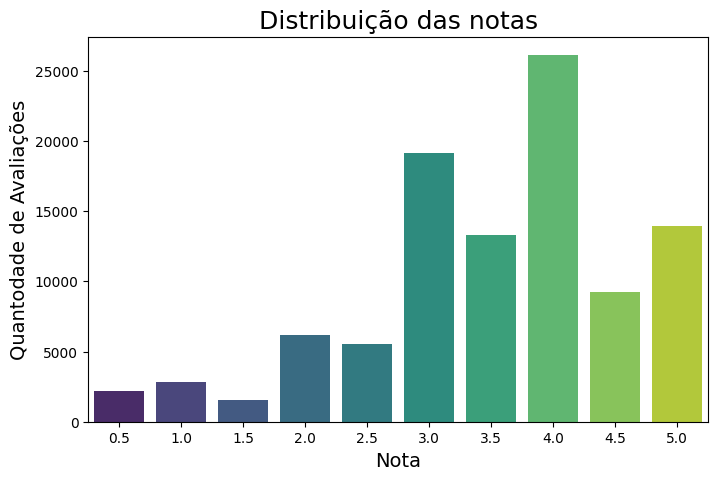

In [3]:
# Criando uma figura
plt.figure(figsize = (8, 5))
sns.countplot( data = avaliacoes, x = 'nota', palette = 'viridis')

plt.title('Distribuição das notas', fontsize = 18)
plt.xlabel('Nota', fontsize = 14)
plt.ylabel('Quantodade de Avaliações', fontsize = 14)
plt.show()

# Evolução da quantidade de avaliações por ano

Apesar de pequenas variações ao longo do tempo, o volume total de avaliações se manteve relativamente estável.  
Não há indícios de crescimento constante — o que pode indicar que o dataset representa uma base já consolidada de usuários com comportamento estável.


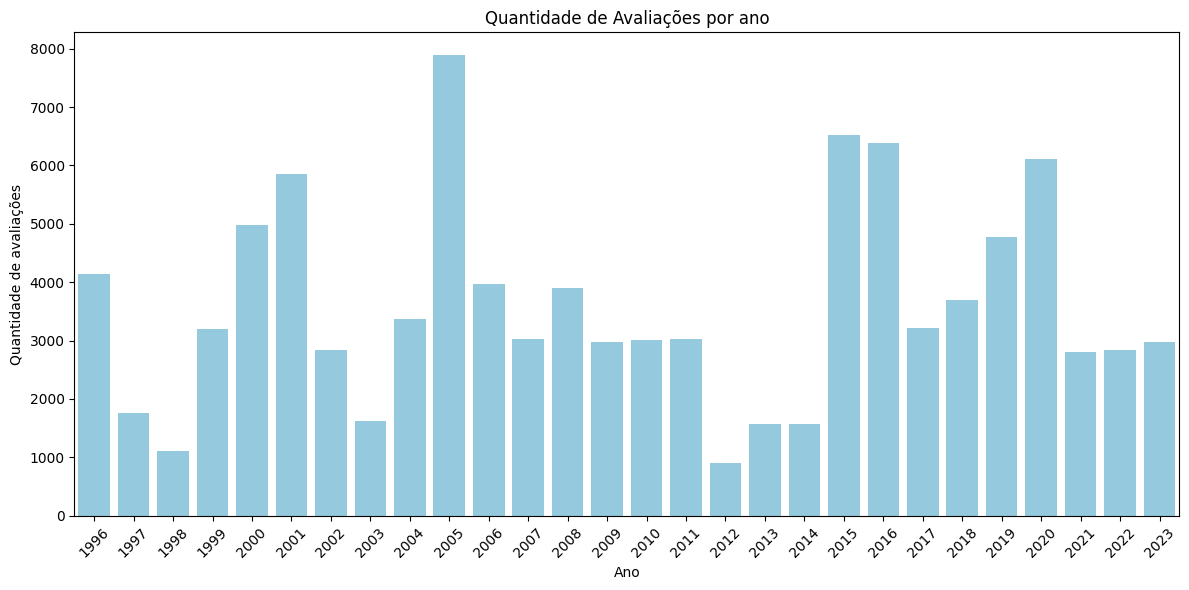

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data = avaliacoes, x = 'ano', color = 'skyblue')

plt.title('Quantidade de Avaliações por ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de avaliações')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()


# Top 10 filmes mais avaliados

Vamos identificar quais são os filmes que mais receberam avaliações na base de dados.  
Isso nos ajuda a entender quais títulos geram mais engajamento por parte dos usuários.


In [ ]:
filmes_mais_avaliados = (
    avaliacoes['filmeId']
    .value_counts() # quantas vezes cada filme foi avaliado
    .head(10)
    .reset_index() # transforma a série em DataFrame com duas colunas: index e filmeId
)
filmes_mais_avaliados.columns = ['filmeId', 'quantidade']
filmes_com_nomes = filmes_mais_avaliados.merge(filmes, on = 'filmeId') # Junta com o DataFrame filmes pra incluir o nome do filme.
filmes_com_nomes

,filmeId,quantidade,titulo,generos
0,318,319,"Shawshank Redemption, The (1994)",Crime|Drama
1,356,316,Forrest Gump (1994),Comedy|Drama|Romance|War
2,2571,296,"Matrix, The (1999)",Action|Sci-Fi|Thriller
3,296,295,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
4,593,273,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
5,260,270,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
6,4993,246,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy
7,2959,236,Fight Club (1999),Action|Crime|Drama|Thriller
8,1196,228,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi
9,480,228,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller


# Comparação entre quantidade de avaliações e média das notas

Agora vamos calcular a média de nota que cada um dos 10 filmes mais avaliados recebeu.  
Com isso, podemos analisar se a popularidade (quantidade de avaliações) está relacionada com qualidade percebida (nota média).


In [ ]:
# Calcula a média das notas por filme
medias = (
    avaliacoes
    .groupby('filmeId')['nota']
    .mean()
    .reset_index()
)

# Junta os dados de média com os filmes mais avaliados
filmes_completos = filmes_com_nomes.merge(medias, on='filmeId')

# Mostra o título, quantidade de avaliações e nota média
filmes_completos[['titulo', 'quantidade', 'nota']]


,titulo,quantidade,nota
0,"Shawshank Redemption, The (1994)",319,4.385580
1,Forrest Gump (1994),316,3.938291
2,"Matrix, The (1999)",296,4.119932
3,Pulp Fiction (1994),295,4.132203
4,"Silence of the Lambs, The (1991)",273,4.062271
5,Star Wars: Episode IV - A New Hope (1977),270,4.059259
6,"Lord of the Rings: The Fellowship of the Ring,...",246,3.995935
7,Fight Club (1999),236,4.239407
8,Star Wars: Episode V - The Empire Strikes Back...,228,4.100877
9,Jurassic Park (1993),228,3.769737


# Notas médias dos 10 filmes mais avaliados

Vamos visualizar as notas médias dos 10 filmes que mais receberam avaliações.  
Isso nos ajuda a ver quais desses filmes são considerados melhores pela média das avaliações.


<ipython-input-25-82e3da67e296>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = filmes_ordenados, x = 'nota', y = 'titulo', palette ='crest')


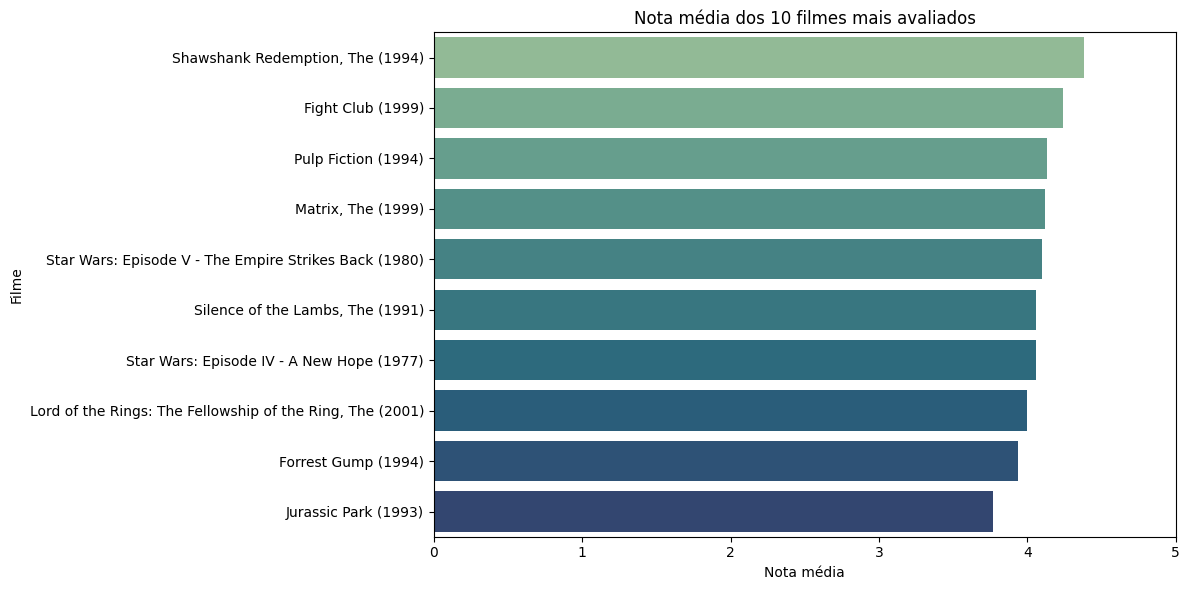

In [ ]:
# Ordena o DataFrame pela nota média (decrescente)
filmes_ordenados = filmes_completos.sort_values(by = 'nota', ascending = False)

plt.figure(figsize = (12,6))
sns.barplot(data = filmes_ordenados, x = 'nota', y = 'titulo', palette ='crest')

plt.title('Nota média dos 10 filmes mais avaliados')
plt.xlabel('Nota média')
plt.ylabel('Filme')
plt.xlim(0,5)
plt.tight_layout()
plt.show()

### Conclusões

Com esse projeto, conseguimos tirar alguns aprendizados:

- A maioria das notas ficou entre 3 e 5, o que mostra que os usuários costumam avaliar de forma mais positiva.
- A quantidade de avaliações por ano não teve grandes mudanças, ficou bem estável.
- Os filmes mais avaliados nem sempre são os que têm as melhores notas.
- Alguns filmes, como *The Shawshank Redemption*, conseguem manter uma nota altíssima mesmo com um número enorme de avaliações – o que mostra uma boa consistência.

Além disso, esse projeto foi uma boa forma de treinar o básico de:

- Manipulação de dados com **Pandas**  
- Criação de gráficos com **Seaborn** e **Matplotlib**  
- E principalmente, entender como tirar algumas ideias legais olhando pra dados reais
